In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
# Read data from source file.
df = pd.read_csv('cscv_cleaned.csv')
df.head(3)

,1.你的性别：,2.你就读的学校的全称是：,3.你的在读学历：,4.你的年级,5.你认为学历对你的就业影响有多大？,6.相比就业，你多大程度上更愿意进行升本、考研等继续教育？,7.你认为大学专业学习对你的就业影响有多大？,8.你认为大学非本专业学习或跨专业、多专业的学习对你的就业影响有多大？,9.你认为大学期间的种类实践活动及技术技能培训、职业培训等会多大程度上影响你的择业就业？,10.你认为相较于知识和技能，在大学中培养的思维方式、处事方法等会对你的择业就业有多大影响？,...,21.如果第一份工作不开心或不顺心，你多大可能会选择直接离职？,22.你对频繁离职或跳槽的接受度有多高？,23.父母、老师等长辈会对你的就业产生多大影响？,24.朋友、同学等会对你的就业产生多大影响？,25.你的男（或女）朋友会对你的就业有多大影响？,26.你有多大信心独立自主而不借助于长辈、关系等找到自己满意的职业？,27.你对自己关于目前就业形势的了解与判断有多大信心？,28.相比传统行业和传统职业 ，你有多倾向于选择新兴行业和新兴职业？,29.你对自己的职业生涯规划有多清晰？,30.相比择业就业，你有多大倾向于自主创业？
0,A.男,四川电影电视学院,B.本科,D.大四,7,7,5,7,7,8,...,7,4,7,6,5.0,8,6,10,6,7
1,A.男,四川电影电视学院,B.本科,C.大三,9,8,7,4,8,7,...,4,6,4,1,5.0,5,4,6,3,1
2,B.女,四川电影电视学院,B.本科,D.大四,9,10,9,9,9,8,...,9,4,6,6,5.0,7,8,8,7,7


In [3]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
1.你的性别：                                           1309 non-null object
2.你就读的学校的全称是：                                     1309 non-null object
3.你的在读学历：                                         1309 non-null object
4.你的年级                                            1309 non-null object
5.你认为学历对你的就业影响有多大？                                1309 non-null int64
6.相比就业，你多大程度上更愿意进行升本、考研等继续教育？                     1309 non-null int64
7.你认为大学专业学习对你的就业影响有多大？                            1309 non-null int64
8.你认为大学非本专业学习或跨专业、多专业的学习对你的就业影响有多大？               1309 non-null int64
9.你认为大学期间的种类实践活动及技术技能培训、职业培训等会多大程度上影响你的择业就业？      1309 non-null int64
10.你认为相较于知识和技能，在大学中培养的思维方式、处事方法等会对你的择业就业有多大影响？    1309 non-null int64
11.不考虑专业，你多大程度上会从自己的兴趣爱好或梦想出发择业就业？                1309 non-null int64
12.你多大程度上愿意在学校所在地就业？                              1309 non-null int64
13.你多大程度上愿意回到家乡所在地就业？                            

# Drop irrelative columns
df.drop(['编号','开始答题时间','结束答题时间','QQ','微信标识','自定义字段','Unnamed: 36'], axis=1, inplace=True)
df.info()

In [4]:
# Extract survey questions and map them to string code into the data
allQuestions = df.columns
df.columns = ['q' + str(i) for i in range(1,31)]
df = df[df.iloc[:,4:].min(axis=1) < 7]
df = df[df.max(axis=1) - df.min(axis=1) > 2]
df.reset_index(inplace=True, drop=True)
to_drop = []
for i in range(len(df)):
    if len(set(df.iloc[:, 4:].values[i])) < 4:
        to_drop.append(i)
df.drop(to_drop, inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 30 columns):
q1     1222 non-null object
q2     1222 non-null object
q3     1222 non-null object
q4     1222 non-null object
q5     1222 non-null int64
q6     1222 non-null int64
q7     1222 non-null int64
q8     1222 non-null int64
q9     1222 non-null int64
q10    1222 non-null int64
q11    1222 non-null int64
q12    1222 non-null int64
q13    1222 non-null int64
q14    1222 non-null int64
q15    1222 non-null int64
q16    1222 non-null int64
q17    1222 non-null int64
q18    1222 non-null int64
q19    1222 non-null int64
q20    1222 non-null int64
q21    1222 non-null int64
q22    1222 non-null int64
q23    1222 non-null int64
q24    1222 non-null int64
q25    1222 non-null float64
q26    1222 non-null int64
q27    1222 non-null int64
q28    1222 non-null int64
q29    1222 non-null int64
q30    1222 non-null int64
dtypes: float64(1), int64(25), object(4)
memory usage: 286.5+ KB


# Question 2 allows free typing. Probably all kinds of inputs woulc appear. So take a look first.
df.q2.value_counts()

# Organize question 2 and see the value counts.
for i in range(len(df)):
    if '山西' in df.q2[i]:
        df.q2[i] = '山西水利职业技术学院'
    elif '人文' in df.q2[i]:
        df.q2[i] = '东北师范大学人文学院'
    elif '商' in df.q2[i]:
        df.q2[i] = '四川工商学院'
    else:
        df.q2[i] = '四川电影电视学院'
df.q2.value_counts()

# Remove invalid samples where all questions got the same value, or the values are all below 6 or all above 5. 
df = df[df.max(axis=1) - df.min(axis=1) > 2]
df = df[df.iloc[:,4:].max(axis=1) > 5]
df = df[df.iloc[:,4:].min(axis=1) < 7]
df.reset_index(inplace=True, drop=True)
df.info()

# Question 25 got missing values. Take a look at its mean and mode for filling.
df.q25.mean(), df.q25.mode()

# Fill the missing values of q25 with mode 5.
df.q25 = df.q25.fillna(5, axis=0)
df.info()

# Restore columns with allQuestions and save the source to file as cleaned backup.
df1 = df.copy()
df1.columns = allQuestions
#df1.to_csv('cscv_cleaned.csv', index=False)

In [5]:
# Now start to get an overview of the questions. 
df.q1.value_counts()

B.女    900
A.男    322
Name: q1, dtype: int64

In [6]:
# And the education level
df.q3.value_counts()

B.本科    629
A.专科    593
Name: q3, dtype: int64

In [7]:
# And college years.
df.q4.value_counts()

B.大二    577
C.大三    352
A.大一    274
D.大四     19
Name: q4, dtype: int64

In [8]:
pd.crosstab(index=df.q3, columns=df.q4)

q4,A.大一,B.大二,C.大三,D.大四
q3,,,,
A.专科,69,514,9,1
B.本科,205,63,343,18


In [9]:
pd.crosstab(index=df.q3, columns=df.q1)

q1,A.男,B.女
q3,,
A.专科,172,421
B.本科,150,479


In [10]:
pd.crosstab(index=df.q3, columns=df.q2)

q2,东北师范大学人文学院,四川工商学院,四川电影电视学院,山西水利职业技术学院
q3,,,,
A.专科,0,71,521,1
B.本科,69,199,361,0


In [11]:
pd.crosstab(index=df.q1, columns=df.q2)

q2,东北师范大学人文学院,四川工商学院,四川电影电视学院,山西水利职业技术学院
q1,,,,
A.男,5,53,264,0
B.女,64,217,618,1


In [12]:
pd.crosstab(index=df.q2, columns=df.q4)

q4,A.大一,B.大二,C.大三,D.大四
q2,,,,
东北师范大学人文学院,18,41,9,1
四川工商学院,253,6,9,2
四川电影电视学院,3,530,333,16
山西水利职业技术学院,0,0,1,0


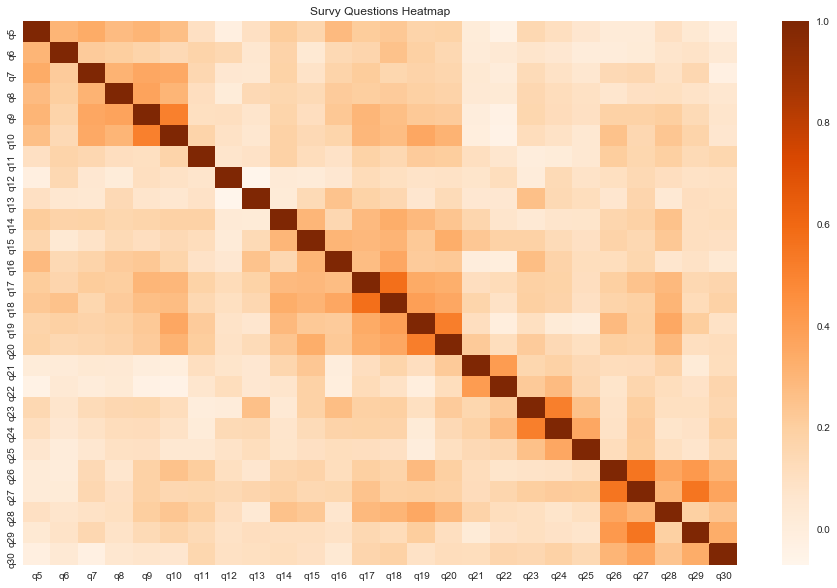

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='Oranges')
plt.title('Survy Questions Heatmap')
plt.show()

In [14]:
# Delve into the correlations. Firstly reorganize the correlation data.
dfcorr = df.corr().unstack()
dfcorr.drop_duplicates(inplace=True) # Original matrix is symetric, so need to drop the duplicates.
dfcorr = dfcorr[dfcorr != 1]         # And drop the self-related items.
dfcorr = dfcorr.reset_index()        # Reset index.
dfcorr.columns = ['question1', 'question2', 'CorrValue'] # Rename columns
dfcorr.head()

,question1,question2,CorrValue
0,q5,q6,0.304915
1,q5,q7,0.341523
2,q5,q8,0.278412
3,q5,q9,0.305720
4,q5,q10,0.265939


In [15]:
# See if any strong correlation exists between any two of the features.
dfcorr[dfcorr.CorrValue > 0.5]

,question1,question2,CorrValue
94,q9,q10,0.513857
234,q17,q18,0.577588
259,q19,q20,0.519533
297,q23,q24,0.518035
315,q26,q27,0.554476
320,q27,q29,0.552985


In [16]:
# All these relatively strongly correlated questions have already been clustered into the desired groups.
# Now let's find weakly correlated questions to see if any insights can be drawn.
dfcorr[dfcorr.CorrValue.between(0.3, 0.5)]

,question1,question2,CorrValue
0,q5,q6,0.304915
1,q5,q7,0.341523
3,q5,q9,0.305720
49,q7,q8,0.313854
50,q7,q9,0.357293
51,q7,q10,0.348597
72,q8,q9,0.376264
73,q8,q10,0.303224
101,q9,q17,0.301396
123,q10,q19,0.358217


In [17]:
# Walk through all these pairs. And some interesting correlations can be noted for future analysis.
relPairs = [
    ('q9', 'q17'),   # 实践培训 vs 民企私营单位
    ('q10', 'q19'),  # 思维方法 vs 自我发展
    ('q10', 'q20'),  # 思维方法 vs 生活工作平衡
    ('q15', 'q16'),  # 薪资福利 vs 国营
    ('q15', 'q18'),  # 薪资福利 vs 外资
    ('q15', 'q20'),  # 薪资福利 vs 生活工作平衡
    ('q19', 'q28'),  # 自我发展 vs 传统/新兴职业
    ('q26', 'q28'),  # 自立就业信心 vs 传统/新兴职业
    ('q27', 'q28')   # 就业形势 vs 传统/新兴职业
]

In [18]:
# And manually grouped.
groups = {
    'basicInfo': ['q1', 'q2', 'q3', 'q4'],                 # 基本情况
    'eduMajor': ['q5', 'q6', 'q7', 'q8', 'q9', 'q10'],     # 教育技能 
    'geo': ['q12', 'q13', 'q14'],                          # 地理因素
    'coreFactors': ['q11', 'q15', 'q19', 'q20'],           # 核心期望
    'employer': ['q16', 'q17', 'q18', 'q28'],              # 雇主预期
    'dropout': ['q21', 'q22'],                             # 离职考量
    'influencers': ['q23', 'q24', 'q25'],                  # 决策影响者
    'selfAwareness': ['q26', 'q27', 'q29'],                # 自我认知
    'selfEmployed': ['q30']                                # 创业倾向
}
    
for q in allQuestions:
    print(q)

1.你的性别：
2.你就读的学校的全称是：
3.你的在读学历：
4.你的年级
5.你认为学历对你的就业影响有多大？
6.相比就业，你多大程度上更愿意进行升本、考研等继续教育？
7.你认为大学专业学习对你的就业影响有多大？
8.你认为大学非本专业学习或跨专业、多专业的学习对你的就业影响有多大？
9.你认为大学期间的种类实践活动及技术技能培训、职业培训等会多大程度上影响你的择业就业？
10.你认为相较于知识和技能，在大学中培养的思维方式、处事方法等会对你的择业就业有多大影响？
11.不考虑专业，你多大程度上会从自己的兴趣爱好或梦想出发择业就业？
12.你多大程度上愿意在学校所在地就业？
13.你多大程度上愿意回到家乡所在地就业？
14.你多大程度上倾向于在一二线大城市就业？
15.就业时你多大程度上首先考虑薪资福利？
16.对于在国企、政府及事业单位，你在择业时倾向于选择的意愿有多大？
17.对于民营及私营企业单位，你在择业时倾向于选择的意愿有多大？
18.对于外商独资及合资企事业单位，你在择业时倾向于选择的意愿有多大？
19.就业时你多大程度上首先考虑自我提升与长期发展？
20.对生活与工作的平衡的期望会对你的就业产生多大影响？
21.如果第一份工作不开心或不顺心，你多大可能会选择直接离职？
22.你对频繁离职或跳槽的接受度有多高？
23.父母、老师等长辈会对你的就业产生多大影响？
24.朋友、同学等会对你的就业产生多大影响？
25.你的男（或女）朋友会对你的就业有多大影响？
26.你有多大信心独立自主而不借助于长辈、关系等找到自己满意的职业？
27.你对自己关于目前就业形势的了解与判断有多大信心？
28.相比传统行业和传统职业 ，你有多倾向于选择新兴行业和新兴职业？
29.你对自己的职业生涯规划有多清晰？
30.相比择业就业，你有多大倾向于自主创业？


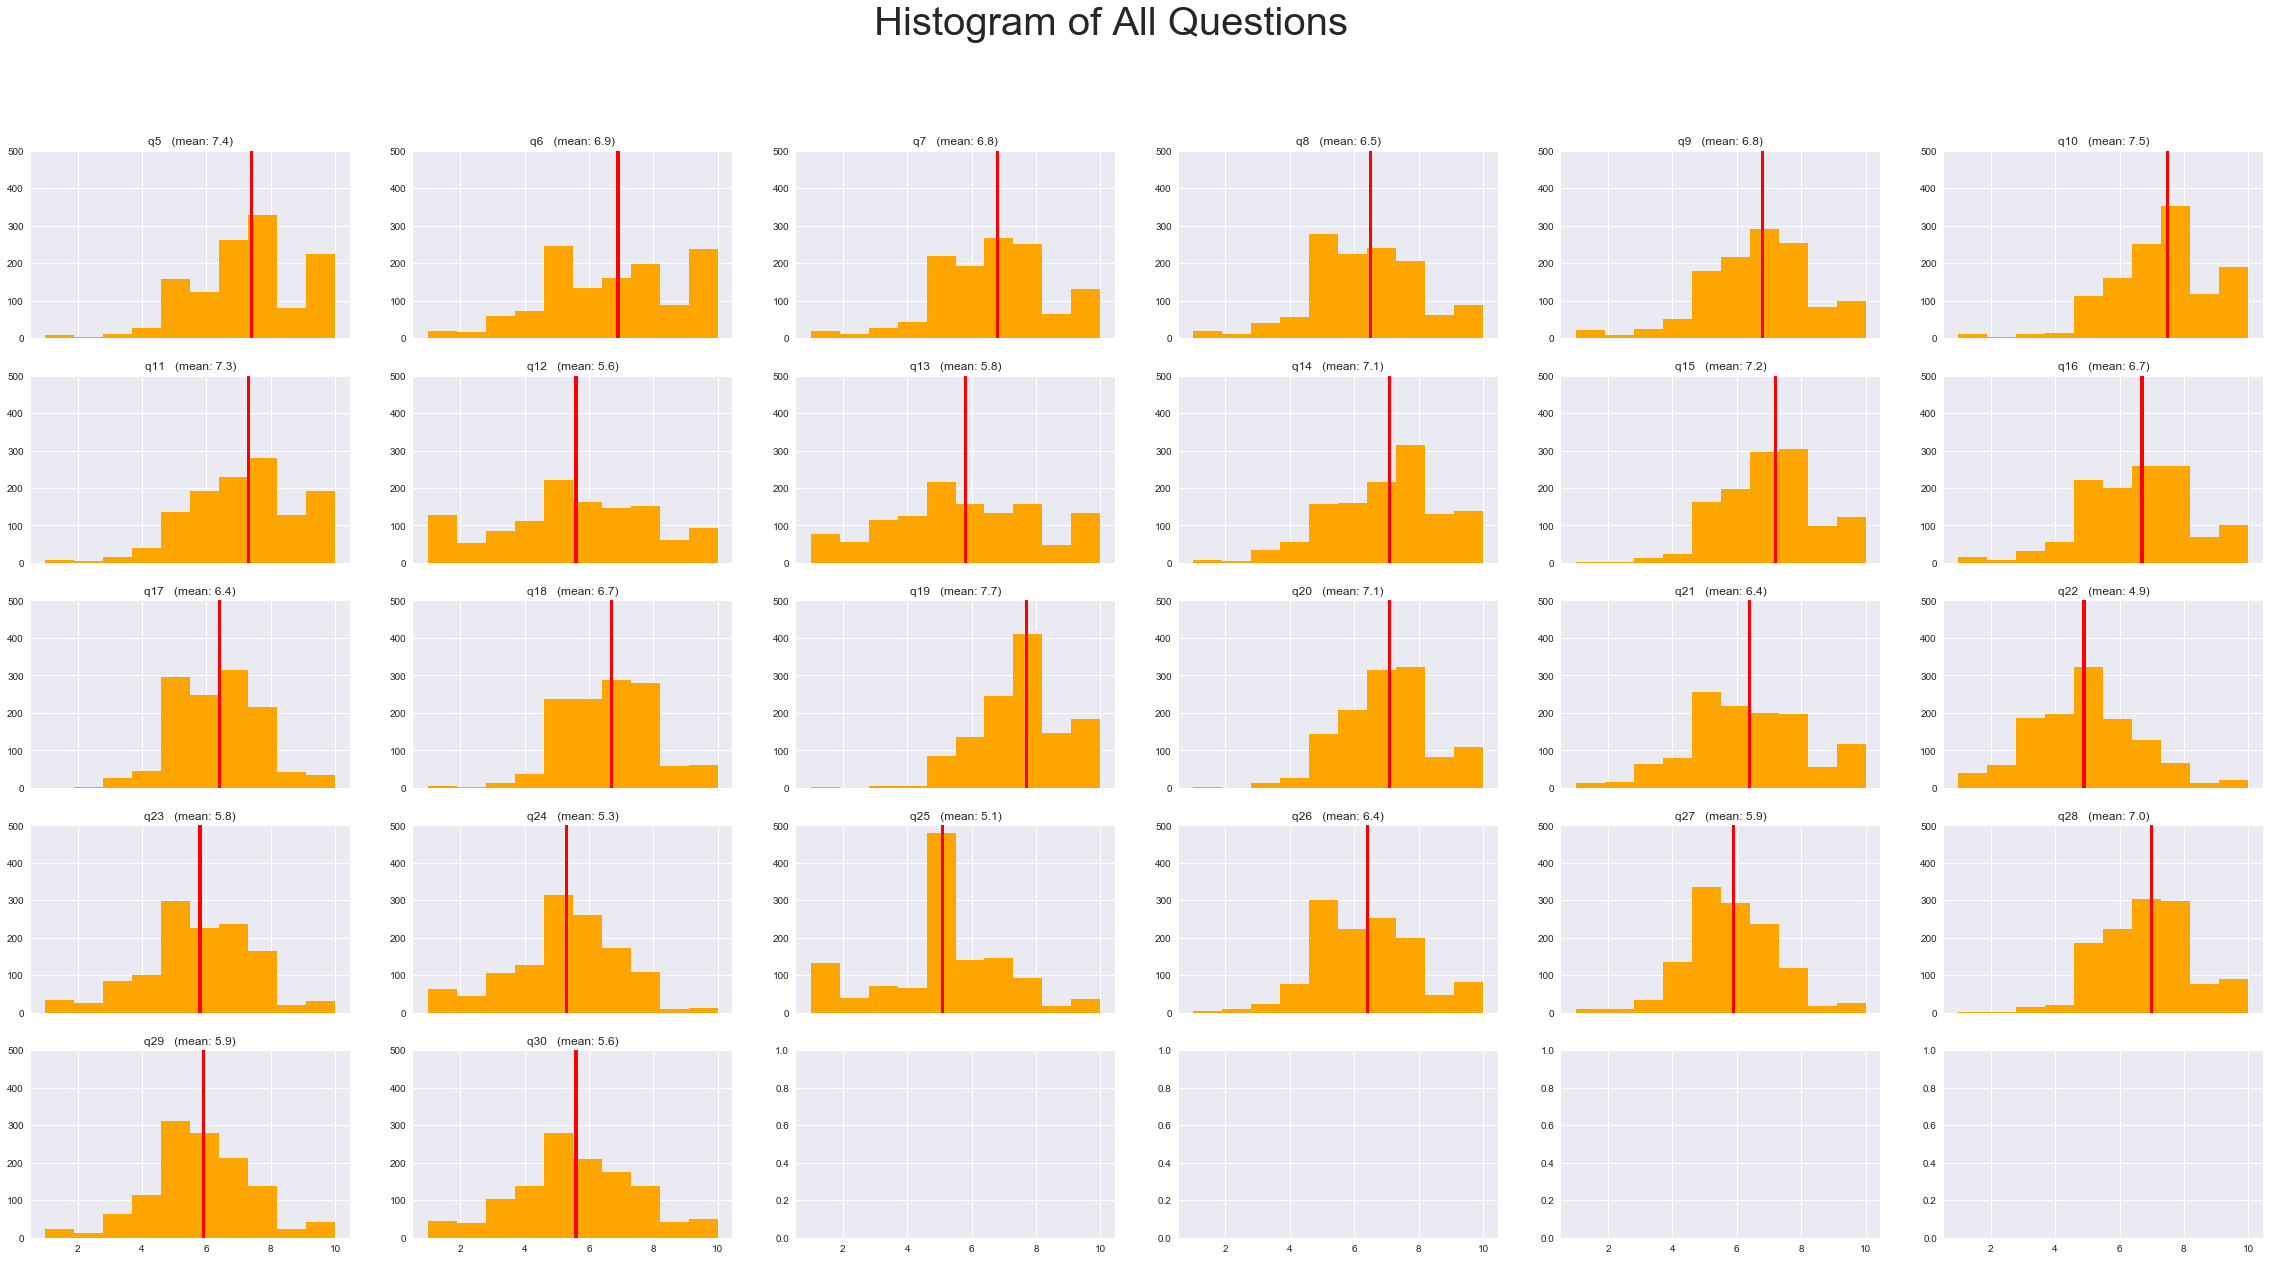

In [19]:
# Plot histogram for all questions to get an overview of their distributions.
fig, ax = plt.subplots(figsize=(40,20), nrows=5, ncols=6, sharex=True)
fig.suptitle('Histogram of All Questions', fontsize=40)
xy = []
for x in range(5):
    for y in range(6):
        xy.append((x, y))
for ((x, y), q) in zip(xy, df.columns[4:]):
    ax[(x, y)].hist(df[q], color='orange')
    ax[(x, y)].bar(round(df[q].mean(), 1), 500, color='red', width=.1)
    ax[(x, y)].title.set_text('{}   (mean: {})'.format(q, round(df[q].mean(), 1), fontsize=14))
    ax[(x, y)].set_ylim(0,500)
plt.show()

#### Left skewed: 
    q5 to q11,     q14 to q21,     q26,    q28
#### Right skewed
    q22
#### Approximately evenly distributed: 
    q12,     q13
#### Similar to Gaussian distribution: 
    q23 to q25,     q27,    q29,     q30

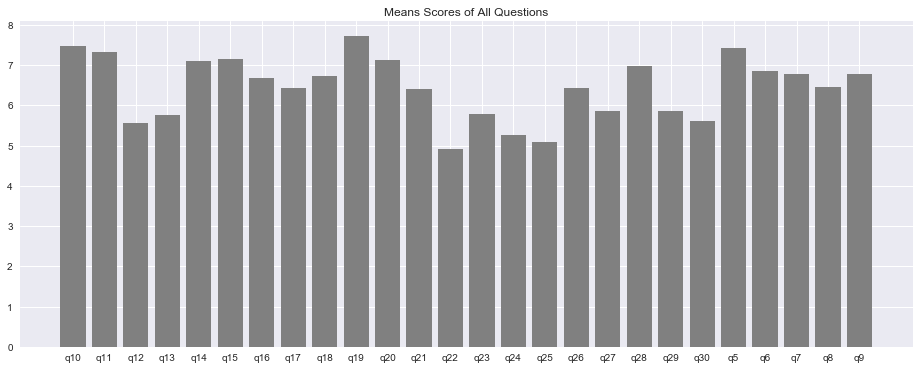

In [20]:
# All question means are between 4.9 and 7.7.
plt.figure(figsize=(16,6))
plt.bar(df.columns[4:], [df[q].mean() for q in df.columns[4:]], color='gray')
plt.title('Means Scores of All Questions')
plt.show()

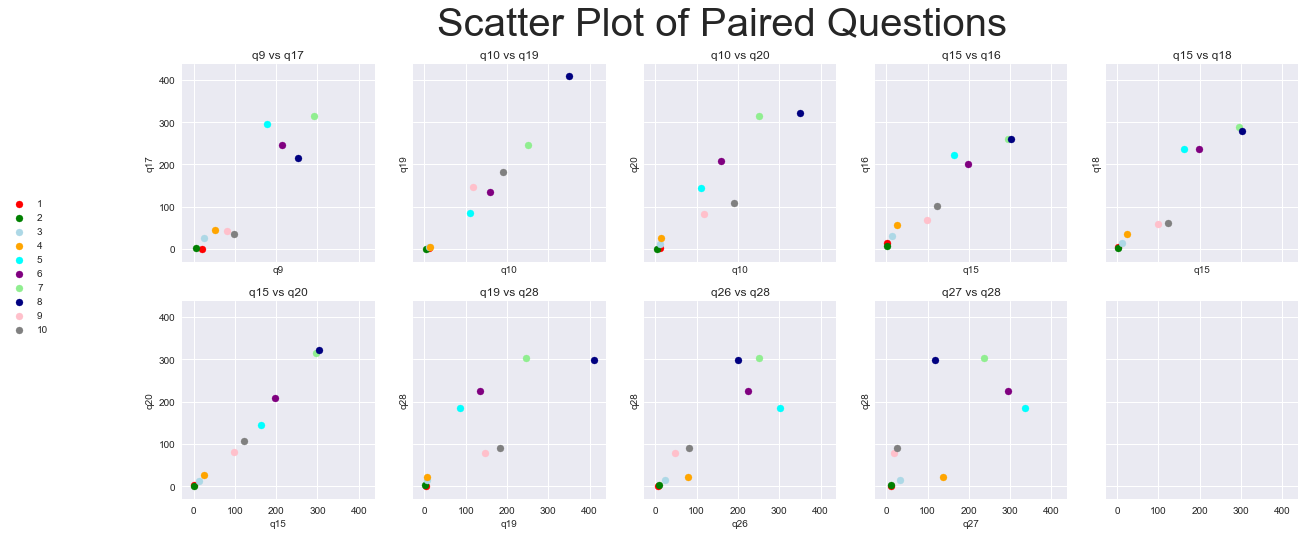

In [21]:
# Plot the relPairs to confirm the correlations
colors = ['red', 'green', 'lightblue', 'orange', 'cyan', 'purple', 'lightgreen', 'navy', 'pink', 'gray']
fig, ax = plt.subplots(figsize=(20,8), nrows=2, ncols=5, sharex=True, sharey=True)
fig.suptitle('Scatter Plot of Paired Questions', fontsize=40)
xy = []
for x in range(2):
    for y in range(5):
        xy.append((x, y))
for (x, y), pair in zip(xy, relPairs):
    p1 = []
    p2 = []
    for i in range(1, 11):
        if i in df[pair[0]].value_counts().index:
            p1.append(df[pair[0]].value_counts()[i])
        else:
            p1.append(0)
        if i in df[pair[1]].value_counts().index:
            p2.append(df[pair[1]].value_counts()[i])
        else:
            p2.append(0)
    for i, color in zip(range(0,11), colors):
        ax[(x, y)].scatter(p1[i],p2[i], color=color)
    ax[(x, y)].title.set_text('{} vs {}'.format(pair[0], pair[1]))
    ax[(x, y)].set_xlabel('{}'.format(pair[0]), fontsize=10)
    ax[(x, y)].set_ylabel('{}'.format(pair[1]), fontsize=10)
fig.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], loc='center left')
plt.show()

# Actually scatter plot of the value counts of questions has no use telling any useful information.

In [22]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

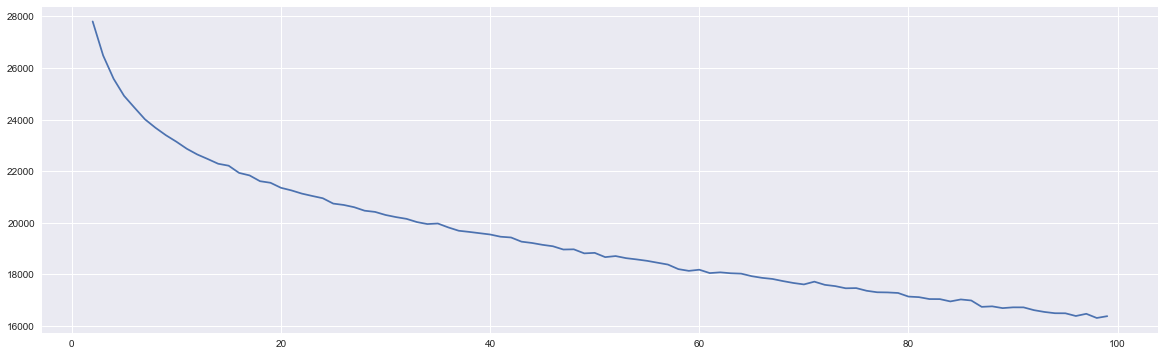

In [23]:
# Try to cluster the samples directly without any further handling
data = df.iloc[:, 4:].values
sclr = StandardScaler()
data = sclr.fit_transform(data)
elist = []
for i in range(2,100):
    km = KMeans(n_clusters=i)
    km.fit(data)
    elist.append(km.inertia_)

plt.figure(figsize=(20,6))    
plt.plot(range(2,100), elist)
plt.show()

Turns out the model isn't doing very well, and the proper clustering comes with too large n_clusters pramater. Not what we want.

In [24]:
groups

{'basicInfo': ['q1', 'q2', 'q3', 'q4'],
 'coreFactors': ['q11', 'q15', 'q19', 'q20'],
 'dropout': ['q21', 'q22'],
 'eduMajor': ['q5', 'q6', 'q7', 'q8', 'q9', 'q10'],
 'employer': ['q16', 'q17', 'q18', 'q28'],
 'geo': ['q12', 'q13', 'q14'],
 'influencers': ['q23', 'q24', 'q25'],
 'selfAwareness': ['q26', 'q27', 'q29'],
 'selfEmployed': ['q30']}

In [25]:
# Define a function to plot the elbow curve for the KMeans classifier.
def plotElbow(data, maxcat):
    sclr = StandardScaler()
    data = sclr.fit_transform(data)
    elist = []
    for i in range(2,maxcat+1):
        km = KMeans(n_clusters=i)
        km.fit(data)
        elist.append(km.inertia_)
    plt.plot(range(2,maxcat+1), elist)
    plt.show()

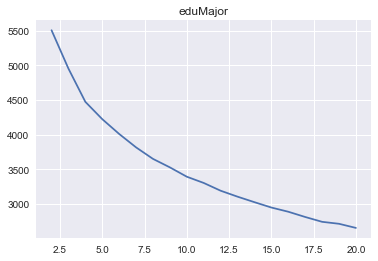

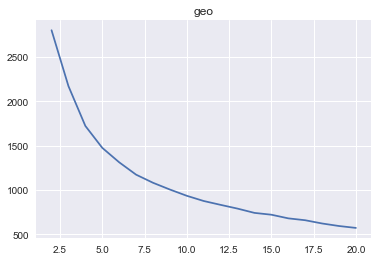

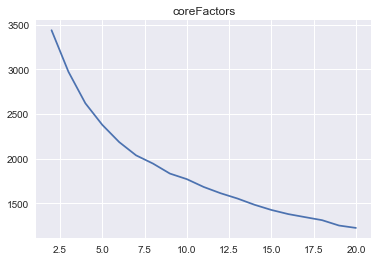

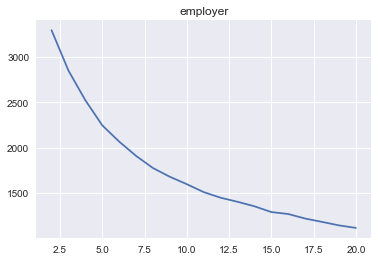

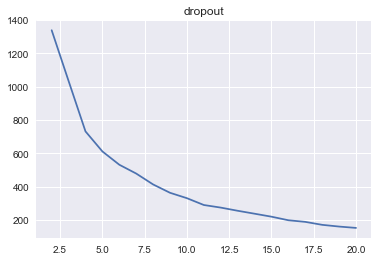

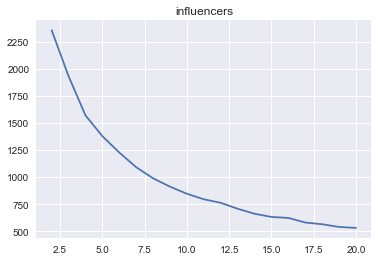

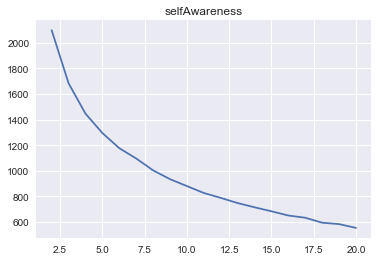

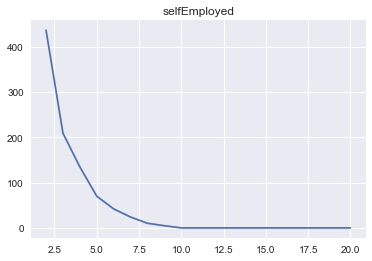

In [26]:
# See if proper elbow points can be drawn from all these groups.
for k, v in groups.items():
    if k != 'basicInfo':
        plt.title(k)
        plotElbow(df[v], 20)
        

Only selfEmployed shows expected curve. Still the proper n_cluster pramater comes late.
Need to figure out other solutions.

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Try out PCA on each group to see if expectation could be satisfied.
pdf = pd.DataFrame(np.zeros((len(df), 8)), columns=[key for key in groups.keys()][1:])
for k, v in groups.items():
    p = PCA(n_components=1)
    if k != 'basicInfo':
        slr = StandardScaler()
        pdf[k] = p.fit_transform(slr.fit_transform(df[v].values))
pdf.head()

,eduMajor,geo,coreFactors,employer,dropout,influencers,selfAwareness,selfEmployed
0,0.172607,1.152897,-0.218224,-1.738515,0.137609,0.619529,-0.609613,-0.666795
1,-0.199903,1.149412,1.010795,2.043887,0.424960,-2.024947,2.114590,2.227783
2,-2.490993,-0.489279,-2.867623,-1.635981,-0.564792,0.299614,-1.397613,-0.666795
3,1.513276,-0.211725,1.088970,1.832057,-1.011767,-0.020302,1.474869,0.780494
4,-0.053895,0.067299,-0.140050,0.354120,-0.213591,-0.306315,0.358489,0.298064


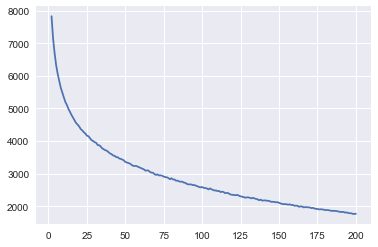

In [29]:
plotElbow(pdf, 200)

PCA is not a good option for this dataset, for losing information after applying it and the outcome isn't as expected.

In [30]:
# What about simply get the mean of each group and cluster with KMeans
pdf = pd.DataFrame(np.zeros((len(df), 8)), columns=list(groups.keys())[1:])
for k, v in groups.items():
    if k != 'basicInfo':
        pdf[k] = df[v].mean(axis=1)
pdf.head()

,eduMajor,geo,coreFactors,employer,dropout,influencers,selfAwareness,selfEmployed
0,6.833333,6.666667,7.50,8.25,5.5,6.000000,6.666667,7.0
1,7.166667,3.666667,6.50,5.00,5.0,3.333333,4.000000,1.0
2,9.000000,7.333333,9.75,8.00,6.5,5.666667,7.333333,7.0
3,5.833333,7.000000,6.50,5.25,7.0,5.333333,4.666667,4.0
4,7.166667,6.000000,7.50,6.50,6.0,4.666667,5.666667,5.0


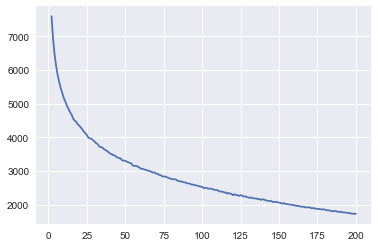

In [31]:
plotElbow(pdf.values, 200)

Using the average ratings of each groups still doesn't yied expected curve.

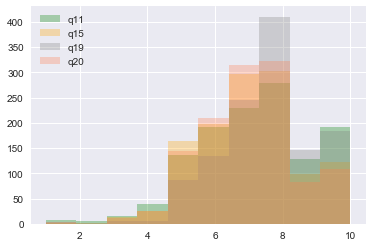

In [32]:
# Now we have to delve into groups for deep feature analysis and see if any improvement could be made.
# In fact, after trying, still expectation can't be satisfied.
# So a different stradegy is taken: combine features with similar distributions, then correlated features.
# Through such approach to finally deduce features of each group into just one.
# This is another way of demensionality reduction.
# And at the same time it scales the differences between features to make comparisons more visible.
# coreFactors first
plt.hist(df.q11, color='green', alpha=.3)
plt.hist(df.q15, color='orange', alpha=.3)
plt.hist(df.q19, color='grey', alpha=.3)
plt.hist(df.q20, color='coral', alpha=.3)
plt.legend(['q11', 'q15', 'q19', 'q20'], loc='upper left')
plt.show()

In [33]:
df[groups['coreFactors']].corr()

,q11,q15,q19,q20
q11,1.000000,0.120955,0.214734,0.206558
q15,0.120955,1.000000,0.223262,0.331225
q19,0.214734,0.223262,1.000000,0.519533
q20,0.206558,0.331225,0.519533,1.000000


In [34]:
coredf = df[groups['coreFactors']]
coredf.describe()

,q11,q15,q19,q20
count,1222.000000,1222.000000,1222.000000,1222.000000
mean,7.320786,7.157119,7.720949,7.136661
std,1.838761,1.610732,1.506699,1.547018
min,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,7.000000,6.000000
50%,7.000000,7.000000,8.000000,7.000000
75%,9.000000,8.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
corenew = np.concatenate([df.q11.values, df.q15.values, df.q19.values, df.q20.values])
labels = ['q11'] * len(df) + ['q15'] * len(df)  + ['q19'] * len(df)  + ['q20'] * len(df) 
results = pairwise_tukeyhsd(corenew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 q11    q15   -0.1637  -0.3332  0.0059 False 
 q11    q19    0.4002   0.2306  0.5697  True 
 q11    q20   -0.1841  -0.3537 -0.0146  True 
 q15    q19    0.5638   0.3943  0.7334  True 
 q15    q20   -0.0205   -0.19   0.1491 False 
 q19    q20   -0.5843  -0.7538 -0.4147  True 
---------------------------------------------


In [89]:
coreFactors = pd.DataFrame(np.zeros((len(df), 3)), columns=['q11', 'q152', 'q19'])
coreFactors.q11 = df.q11
coreFactors.q152 = df[['q15', 'q20']].mean(axis=1)
coreFactors.q19 = df.q19
coreFactors.describe()

,q11,q152,q19
count,1222.000000,1222.000000,1222.000000
mean,7.320786,7.146890,7.720949
std,1.838761,1.288258,1.506699
min,1.000000,3.000000,1.000000
25%,6.000000,6.500000,7.000000
50%,7.000000,7.000000,8.000000
75%,9.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000


In [90]:
coreFactors.corr()

,q11,q152,q19
q11,1.000000,0.199640,0.214734
q152,0.199640,1.000000,0.451518
q19,0.214734,0.451518,1.000000


In [92]:
coreFactors['q1592'] = (coreFactors.q152 + coreFactors.q19) / 2
coreFactors['core'] = (coreFactors.q11 + coreFactors.q1592) / 2
coreFactors = coreFactors.core

## Then apply this strategy to all remaining groups.

In [39]:
edudf = df[groups['eduMajor']]
edudf.describe()

,q5,q6,q7,q8,q9,q10
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,7.431260,6.858429,6.783142,6.454173,6.775777,7.486088
std,1.803111,2.284533,1.911544,1.870705,1.836602,1.740133
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000
50%,8.000000,7.000000,7.000000,6.000000,7.000000,8.000000
75%,8.000000,9.000000,8.000000,8.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [40]:
edudf.corr()

,q5,q6,q7,q8,q9,q10
q5,1.000000,0.304915,0.341523,0.278412,0.305720,0.265939
q6,0.304915,1.000000,0.215954,0.203054,0.175718,0.141965
q7,0.341523,0.215954,1.000000,0.313854,0.357293,0.348597
q8,0.278412,0.203054,0.313854,1.000000,0.376264,0.303224
q9,0.305720,0.175718,0.357293,0.376264,1.000000,0.513857
q10,0.265939,0.141965,0.348597,0.303224,0.513857,1.000000


In [41]:
edunew = np.concatenate([df[i].values for i in groups['eduMajor']])
labels = np.concatenate([[i] * len(df) for i in groups['eduMajor']])
results = pairwise_tukeyhsd(edunew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 q10     q5   -0.0548  -0.2758  0.1661 False 
 q10     q6   -0.6277  -0.8486 -0.4067  True 
 q10     q7   -0.7029  -0.9239  -0.482  True 
 q10     q8   -1.0319  -1.2529  -0.811  True 
 q10     q9   -0.7103  -0.9312 -0.4894  True 
  q5     q6   -0.5728  -0.7938 -0.3519  True 
  q5     q7   -0.6481  -0.8691 -0.4272  True 
  q5     q8   -0.9771   -1.198 -0.7561  True 
  q5     q9   -0.6555  -0.8764 -0.4345  True 
  q6     q7   -0.0753  -0.2962  0.1457 False 
  q6     q8   -0.4043  -0.6252 -0.1833  True 
  q6     q9   -0.0827  -0.3036  0.1383 False 
  q7     q8    -0.329  -0.5499  -0.108  True 
  q7     q9   -0.0074  -0.2283  0.2136 False 
  q8     q9    0.3216   0.1007  0.5425  True 
---------------------------------------------


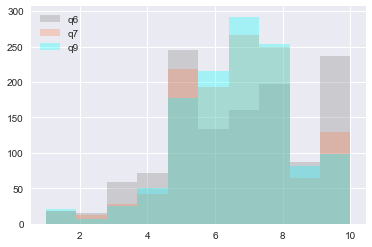

In [42]:
plt.hist(df.q6, color='grey', alpha=.3)
plt.hist(df.q7, color='coral', alpha=.3)
plt.hist(df.q9, color='cyan', alpha=.3)
plt.legend([ 'q6', 'q7', 'q9'], loc='upper left')
plt.show()

These three questions got similar responses. Interestingly, major isn't performing quite as expected, 9 or 10 scores aren't dominating the results.

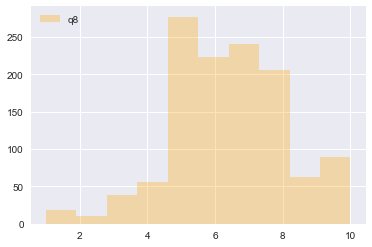

In [43]:
plt.hist(df.q8, color='orange', alpha=.3)
plt.legend(['q8'], loc='upper left')
plt.show()

Q6 got a wider standard deviation, which means students are having quite different opinions in terms of whether to persue further education or not.

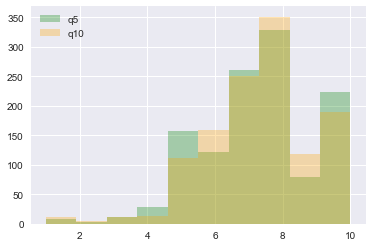

In [44]:
plt.hist(df.q5, color='green', alpha=.3)
plt.hist(df.q10, color='orange', alpha=.3)
plt.legend(['q5', 'q10'], loc='upper left')
plt.show()

These two are dominating the results with plenty of 10 scores.

In [45]:
eduMajor = pd.DataFrame(np.zeros((len(df), 3)), columns=['q50', 'q8', 'q679'])
eduMajor.q50 = edudf[['q5', 'q10']].mean(axis=1)
eduMajor.q8 = edudf.q8
eduMajor.q679 = edudf[['q7', 'q6', 'q9']].mean(axis=1)

In [46]:
eduMajor.describe()

,q50,q8,q679
count,1222.000000,1222.000000,1222.000000
mean,7.458674,6.454173,6.805783
std,1.409620,1.870705,1.418748
min,1.000000,1.000000,1.000000
25%,6.500000,5.000000,6.000000
50%,7.500000,6.000000,6.666667
75%,8.500000,8.000000,7.666667
max,10.000000,10.000000,10.000000


In [47]:
eduMajor.corr()

,q50,q8,q679
q50,1.000000,0.365225,0.567676
q8,0.365225,1.000000,0.412307
q679,0.567676,0.412307,1.000000


In [48]:
eduMajor['q50679'] = (eduMajor.q50 + eduMajor.q679) /2
eduMajor['edu'] = (eduMajor.q50679 + eduMajor.q8) / 2
eduMajor = eduMajor.edu

In [49]:
# Now's the geo group.
geodf = df[groups['geo']]
geodf.describe()

,q12,q13,q14
count,1222.000000,1222.000000,1222.000000
mean,5.553191,5.762684,7.109656
std,2.573417,2.536737,1.883874
min,1.000000,1.000000,1.000000
25%,4.000000,4.000000,6.000000
50%,6.000000,6.000000,7.000000
75%,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000


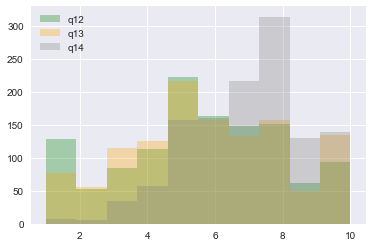

In [50]:
plt.hist(df.q12, color='green', alpha=.3)
plt.hist(df.q13, color='orange', alpha=.3)
plt.hist(df.q14, color='grey', alpha=.3)
plt.legend(['q12', 'q13', 'q14'], loc='upper left')
plt.show()

In [51]:
geodf.corr()

,q12,q13,q14
q12,1.000000,-0.070078,0.026164
q13,-0.070078,1.000000,0.024644
q14,0.026164,0.024644,1.000000


In [52]:
geonew = np.concatenate([df[i].values for i in groups['geo']])
labels = np.concatenate([[i] * len(df) for i in groups['geo']])
results = pairwise_tukeyhsd(geonew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 q12    q13    0.2095  -0.0137 0.4327 False 
 q12    q14    1.5565   1.3333 1.7796  True 
 q13    q14    1.347    1.1238 1.5701  True 
--------------------------------------------


In [53]:
geo = pd.DataFrame(np.zeros((len(df), 2)), columns=['q123', 'q14'])
geo.q123 = df[['q12', 'q13']].mean(axis=1)
geo.q14 = df.q14
geo.describe()

,q123,q14
count,1222.000000,1222.000000
mean,5.657938,7.109656
std,1.742309,1.883874
min,1.000000,1.000000
25%,4.500000,6.000000
50%,5.500000,7.000000
75%,6.875000,8.000000
max,10.000000,10.000000


In [54]:
geo = geo.mean(axis=1)

In [55]:
# Next is the dropout factors.
dropdf = df[groups['dropout']]
dropdf.describe()

,q21,q22
count,1222.000000,1222.000000
mean,6.401800,4.907529
std,2.014224,1.846384
min,1.000000,1.000000
25%,5.000000,4.000000
50%,6.000000,5.000000
75%,8.000000,6.000000
max,10.000000,10.000000


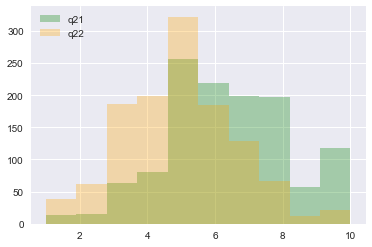

In [56]:
plt.hist(df.q21, color='green', alpha=.3)
plt.hist(df.q22, color='orange', alpha=.3)
plt.legend(['q21', 'q22'], loc='upper left')
plt.show()

In [57]:
dropdf.corr()

,q21,q22
q21,1.000000,0.406173
q22,0.406173,1.000000


In [58]:
dropnew = np.concatenate([df[i].values for i in groups['dropout']])
labels = np.concatenate([[i] * len(df) for i in groups['dropout']])
results = pairwise_tukeyhsd(dropnew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 q21    q22   -1.4943  -1.6475 -1.341  True 
--------------------------------------------


In [59]:
dropout = dropdf.mean(axis=1)

In [60]:
# And the employer group
empdf = df[groups['employer']]
empdf.describe()

,q16,q17,q18,q28
count,1222.000000,1222.000000,1222.000000,1222.000000
mean,6.693126,6.435352,6.719313,6.987725
std,1.849790,1.475543,1.567672,1.546658
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,6.000000,6.000000
50%,7.000000,6.000000,7.000000,7.000000
75%,8.000000,7.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


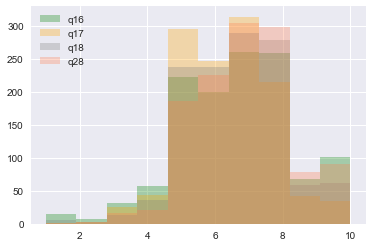

In [61]:
plt.hist(df.q16, color='green', alpha=.3)
plt.hist(df.q17, color='orange', alpha=.3)
plt.hist(df.q18, color='grey', alpha=.3)
plt.hist(df.q28, color='coral', alpha=.3)
plt.legend(['q16', 'q17', 'q18', 'q28'], loc='upper left')
plt.show()

In [62]:
empdf.corr()

,q16,q17,q18,q28
q16,1.000000,0.273433,0.358892,0.065954
q17,0.273433,1.000000,0.577588,0.288723
q18,0.358892,0.577588,1.000000,0.304269
q28,0.065954,0.288723,0.304269,1.000000


In [63]:
empnew = np.concatenate([df[i].values for i in groups['employer']])
labels = np.concatenate([[i] * len(df) for i in groups['employer']])
results = pairwise_tukeyhsd(empnew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 q16    q17   -0.2578  -0.4258 -0.0897  True 
 q16    q18    0.0262  -0.1418  0.1942 False 
 q16    q28    0.2946   0.1266  0.4626  True 
 q17    q18    0.284    0.1159  0.452   True 
 q17    q28    0.5524   0.3843  0.7204  True 
 q18    q28    0.2684   0.1004  0.4364  True 
---------------------------------------------


In [64]:
employer = pd.DataFrame(np.zeros((len(df), 3)), columns=['q168', 'q17', 'q28'])
employer.q168 = (empdf.q16 + empdf.q18) / 2
employer.q17 = df.q17
employer.q28 = df.q28
employer.corr()

,q168,q17,q28
q168,1.000000,0.500184,0.212298
q17,0.500184,1.000000,0.288723
q28,0.212298,0.288723,1.000000


In [65]:
employer['q1678'] = (employer.q168 + employer.q17) / 2
employer = (employer.q1678 + employer.q28) / 2

In [66]:
# Influencers
infdf = df[groups['influencers']]
infdf.describe()

,q23,q24,q25
count,1222.000000,1222.000000,1222.000000
mean,5.774959,5.255319,5.100655
std,1.859327,1.880183,2.141325
min,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000
50%,6.000000,5.000000,5.000000
75%,7.000000,6.000000,6.000000
max,10.000000,10.000000,10.000000


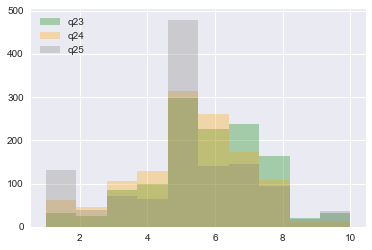

In [67]:
plt.hist(df.q23, color='green', alpha=.3)
plt.hist(df.q24, color='orange', alpha=.3)
plt.hist(df.q25, color='grey', alpha=.3)
plt.legend(['q23', 'q24', 'q25'], loc='upper left')
plt.show()

In [68]:
infdf.corr()

,q23,q24,q25
q23,1.000000,0.518035,0.257478
q24,0.518035,1.000000,0.357740
q25,0.257478,0.357740,1.000000


In [69]:
infnew = np.concatenate([df[i].values for i in groups['influencers']])
labels = np.concatenate([[i] * len(df) for i in groups['influencers']])
results = pairwise_tukeyhsd(infnew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 q23    q24   -0.5196   -0.706 -0.3333  True 
 q23    q25   -0.6743  -0.8606  -0.488  True 
 q24    q25   -0.1547   -0.341  0.0317 False 
---------------------------------------------


In [93]:
influencers = pd.DataFrame(np.zeros((len(df), 2)), columns=['q23', 'q245'])
influencers.q23 = infdf.q23
influencers.q245 = (infdf.q25 + infdf.q24) / 2
influencers = (influencers.q23 + influencers.q245) / 2

In [71]:
# Self Awareness
sadf = df[groups['selfAwareness']]
sadf.describe()

,q26,q27,q29
count,1222.00000,1222.000000,1222.000000
mean,6.43126,5.854337,5.864157
std,1.73175,1.538496,1.752838
min,1.00000,1.000000,1.000000
25%,5.00000,5.000000,5.000000
50%,6.00000,6.000000,6.000000
75%,8.00000,7.000000,7.000000
max,10.00000,10.000000,10.000000


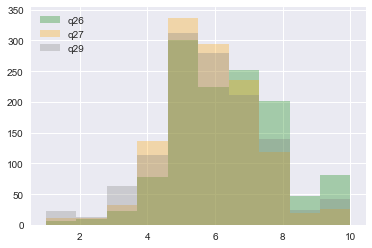

In [72]:
plt.hist(df.q26, color='green', alpha=.3)
plt.hist(df.q27, color='orange', alpha=.3)
plt.hist(df.q29, color='grey', alpha=.3)
plt.legend(['q26', 'q27', 'q29'], loc='upper left')
plt.show()

In [73]:
sadf.corr()

,q26,q27,q29
q26,1.000000,0.554476,0.417824
q27,0.554476,1.000000,0.552985
q29,0.417824,0.552985,1.000000


In [74]:
selfnew = np.concatenate([df[i].values for i in groups['selfAwareness']])
labels = np.concatenate([[i] * len(df) for i in groups['selfAwareness']])
results = pairwise_tukeyhsd(selfnew, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 q26    q27   -0.5769   -0.736 -0.4178  True 
 q26    q29   -0.5671  -0.7262  -0.408  True 
 q27    q29    0.0098  -0.1493  0.1689 False 
---------------------------------------------


In [75]:
selfAwareness = pd.DataFrame(np.zeros((len(df), 2)), columns=['q26', 'q279'])
selfAwareness.q26 = df.q26
selfAwareness.q279 = df[['q27', 'q29']].mean(axis=1)
selfAwareness.describe()

,q26,q279
count,1222.00000,1222.000000
mean,6.43126,5.859247
std,1.73175,1.451027
min,1.00000,1.000000
25%,5.00000,5.000000
50%,6.00000,6.000000
75%,8.00000,7.000000
max,10.00000,10.000000


In [76]:
selfAwareness.corr()

,q26,q279
q26,1.000000,0.546316
q279,0.546316,1.000000


In [77]:
selfAwareness = selfAwareness.mean(axis=1)

In [78]:
# Finally the selfEmployed group
df.q30.describe()

count    1222.00000
mean        5.61784
std         2.07369
min         1.00000
25%         4.00000
50%         6.00000
75%         7.00000
max        10.00000
Name: q30, dtype: float64

In [79]:
df.q30.value_counts(normalize=True, sort=False)

1     0.036825
2     0.031915
3     0.084288
4     0.113748
5     0.228314
6     0.172668
7     0.144026
8     0.112111
9     0.034370
10    0.041735
Name: q30, dtype: float64

In [80]:
selfEmployed = df.q30

In [81]:
groups

{'basicInfo': ['q1', 'q2', 'q3', 'q4'],
 'coreFactors': ['q11', 'q15', 'q19', 'q20'],
 'dropout': ['q21', 'q22'],
 'eduMajor': ['q5', 'q6', 'q7', 'q8', 'q9', 'q10'],
 'employer': ['q16', 'q17', 'q18', 'q28'],
 'geo': ['q12', 'q13', 'q14'],
 'influencers': ['q23', 'q24', 'q25'],
 'selfAwareness': ['q26', 'q27', 'q29'],
 'selfEmployed': ['q30']}

In [94]:
# Now construct a new dataframe putting all groups together. Now only 8 features left.
newdf = pd.DataFrame(np.zeros((len(df), 8)), columns=['core', 'edu', 'geo', 'emplr',
                                                     'dropout', 'inflr', 'selfA', 'selfE'])
newdf.core = coreFactors
newdf.edu = eduMajor
newdf.geo = geo
newdf.emplr = employer
newdf.dropout = dropout
newdf.inflr = influencers
newdf.selfA = selfAwareness
newdf.selfE = selfEmployed

newdf.head()

,core,edu,geo,emplr,dropout,inflr,selfA,selfE
0,7.375,6.958333,6.50,8.750,5.5,6.25,7.00,7
1,6.375,5.916667,4.00,5.500,5.0,3.50,4.25,1
2,9.875,8.958333,7.50,8.000,6.5,5.75,7.25,7
3,6.750,5.166667,7.25,5.500,7.0,5.25,4.75,4
4,7.750,7.541667,6.50,6.875,6.0,5.25,5.75,5


In [95]:
newdf.corr()

,core,edu,geo,emplr,dropout,inflr,selfA,selfE
core,1.000000,0.298586,0.339499,0.456139,0.175891,0.104603,0.319220,0.184652
edu,0.298586,1.000000,0.278516,0.335757,0.027304,0.205852,0.163276,0.058239
geo,0.339499,0.278516,1.000000,0.407855,0.185988,0.209279,0.255901,0.181201
emplr,0.456139,0.335757,0.407855,1.000000,0.196019,0.248239,0.397116,0.265791
dropout,0.175891,0.027304,0.185988,0.196019,1.000000,0.287512,0.139475,0.165430
inflr,0.104603,0.205852,0.209279,0.248239,0.287512,1.000000,0.185703,0.206853
selfA,0.319220,0.163276,0.255901,0.397116,0.139475,0.185703,1.000000,0.395848
selfE,0.184652,0.058239,0.181201,0.265791,0.165430,0.206853,0.395848,1.000000


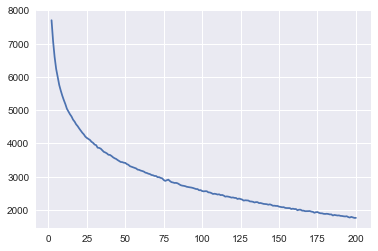

In [84]:
plotElbow(newdf, 200)

In [96]:
# The curve is not as expected, so clustering has to be given up.
# Let's just simply see how each group is considered by these students and see if we could reflect the reality.
newdf.mean()

core       7.377353
edu        6.793201
geo        6.383797
emplr      6.779255
dropout    5.654664
inflr      5.476473
selfA      6.145254
selfE      5.617840
dtype: float64

In [97]:
# The means are quite close to each other actually
# So square the means and devide them by 10 to scale the differences.
newdf.mean()**2/10

core       5.442533
edu        4.614758
geo        4.075286
emplr      4.595830
dropout    3.197523
inflr      2.999176
selfA      3.776414
selfE      3.156012
dtype: float64

In [98]:
newdf.describe()

,core,edu,geo,emplr,dropout,inflr,selfA,selfE
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.00000
mean,7.377353,6.793201,6.383797,6.779255,5.654664,5.476473,6.145254,5.61784
std,1.211353,1.334591,1.306640,1.126580,1.619210,1.503616,1.400894,2.07369
min,2.250000,1.000000,2.000000,2.000000,1.000000,1.000000,1.750000,1.00000
25%,6.500000,5.958333,5.500000,6.000000,4.500000,4.750000,5.000000,4.00000
50%,7.375000,6.791667,6.250000,6.875000,5.500000,5.500000,6.000000,6.00000
75%,8.250000,7.625000,7.250000,7.500000,6.500000,6.500000,7.000000,7.00000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000


In [99]:
tudf = np.concatenate([newdf[i].values for i in newdf.columns])
labels = np.concatenate([[i] * len(df) for i in newdf.columns])
results = pairwise_tukeyhsd(tudf, labels, .05)
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
  core  dropout -1.7227  -1.9034  -1.542  True 
  core    edu   -0.5842  -0.7649 -0.4034  True 
  core   emplr  -0.5981  -0.7788 -0.4174  True 
  core    geo   -0.9936  -1.1743 -0.8128  True 
  core   inflr  -1.9009  -2.0816 -1.7202  True 
  core   selfA  -1.2321  -1.4128 -1.0514  True 
  core   selfE  -1.7595  -1.9402 -1.5788  True 
dropout   edu    1.1385   0.9578  1.3193  True 
dropout  emplr   1.1246   0.9439  1.3053  True 
dropout   geo    0.7291   0.5484  0.9098  True 
dropout  inflr  -0.1782  -0.3589  0.0025 False 
dropout  selfA   0.4906   0.3099  0.6713  True 
dropout  selfE  -0.0368  -0.2175  0.1439 False 
  edu    emplr  -0.0139  -0.1947  0.1668 False 
  edu     geo   -0.4094  -0.5901 -0.2287  True 
  edu    inflr  -1.3167  -1.4974  -1.136  True 
  edu    selfA  -0.6479  -0.8287 -0.4672  True 
  edu    selfE  -1.1754  -1.3561 -0.9

In [106]:
dfcorr[dfcorr.CorrValue < 0]

,question1,question2,CorrValue
6,q5,q12,-0.017215
16,q5,q22,-0.037458
24,q5,q30,-0.018969
71,q7,q30,-0.025056
106,q9,q22,-0.035584
125,q10,q21,-0.005063
126,q10,q22,-0.044882
146,q11,q23,-0.000667
154,q12,q13,-0.070078
224,q16,q21,-0.001390


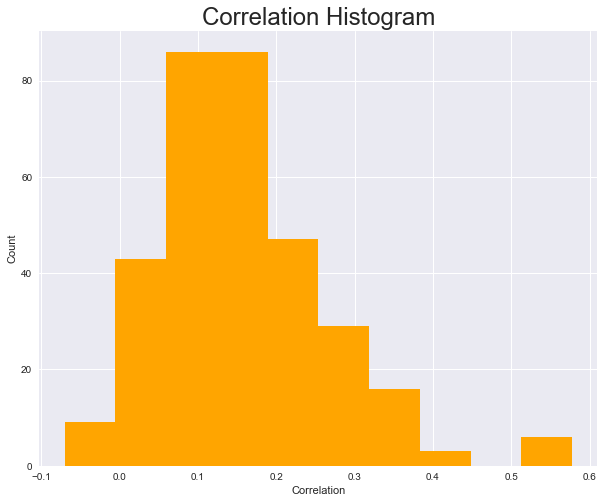

In [110]:
plt.figure(figsize=(10,8), )
dfcorr.CorrValue.hist(color='orange')
plt.title('Correlation Histogram', fontsize=24)
plt.xlabel('Correlation')
plt.ylabel('Count')
plt.show()